1. What does data mean?

Movie lens is a web based recommender system Our file  contain 1,000,209 anonymous ratings of approximately 3,900 movies 
made by 6,040 MovieLens users who joined MovieLens in 2000.From Visualisation we came to know that users of age group 25-34 are more concerned about giving
ratings to the movies the highest ratings that were given are 4, word 'comedy' is the most commonly used word in movies genre.Action,Drama and Thriller are also among the most occuring words.I think This encapsulates the idea of presence of comedy in large amount in movies genres.The users who watched or rated movies are lies between age(20-30) and from o we came to know that the recommeneded system algorithms that we have to keep in mind are content based because it requires essentials to recommend users like their users id the most movies they watch so for this moviedID and mean ratings given to any movie and collborative based .


importing libraries



In [96]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
from scipy import *
import matplotlib.pyplot as plt
import seaborn as sns

In [97]:
df=pd.read_csv('/content/C__Users_Nabeel-pc_Desktop_movies_dataframe_grouplens.csv')

In [98]:
df.head(12)

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children's
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [99]:
df.shape

(3883, 3)

In [100]:
df_users=pd.read_csv("/content/users.csv")

In [101]:
df_users.head(20)

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,2460
4,5,M,25,20,55455
5,6,F,50,9,55117
6,7,M,35,1,6810
7,8,M,25,12,11413
8,9,M,25,17,61614
9,10,F,35,1,95370


In [102]:
df_users.shape

(6040, 5)

In [103]:
df_ratings=pd.read_csv("/content/ratings.csv")
df_ratings.head(20)

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
5,1,1197,3,978302268
6,1,1287,5,978302039
7,1,2804,5,978300719
8,1,594,4,978302268
9,1,919,4,978301368


In [104]:
df_ratings.shape

(1000209, 4)

In [105]:
#merging of movies,users and ratings dataset
df_merge=pd.merge(df_users,df_ratings,on='UserID',how='left')

In [106]:
df_merge

,UserID,Gender,Age,Occupation,Zip-code,MovieID,Rating,Timestamp
0,1,F,1,10,48067,1193,5,978300760
1,1,F,1,10,48067,661,3,978302109
2,1,F,1,10,48067,914,3,978301968
3,1,F,1,10,48067,3408,4,978300275
4,1,F,1,10,48067,2355,5,978824291
...,...,...,...,...,...,...,...,...
1000204,6040,M,25,6,11106,1091,1,956716541
1000205,6040,M,25,6,11106,1094,5,956704887
1000206,6040,M,25,6,11106,562,5,956704746
1000207,6040,M,25,6,11106,1096,4,956715648


In [107]:
df_merge2=pd.merge(df_merge,df,on='MovieID',how='left')
df_merge2

,UserID,Gender,Age,Occupation,Zip-code,MovieID,Rating,Timestamp,Title,Genres
0,1,F,1,10,48067,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,1,F,1,10,48067,661,3,978302109,James and the Giant Peach (1996),Animation|Children's|Musical
2,1,F,1,10,48067,914,3,978301968,My Fair Lady (1964),Musical|Romance
3,1,F,1,10,48067,3408,4,978300275,Erin Brockovich (2000),Drama
4,1,F,1,10,48067,2355,5,978824291,"Bug's Life, A (1998)",Animation|Children's|Comedy
...,...,...,...,...,...,...,...,...,...,...
1000204,6040,M,25,6,11106,1091,1,956716541,Weekend at Bernie's (1989),Comedy
1000205,6040,M,25,6,11106,1094,5,956704887,"Crying Game, The (1992)",Drama|Romance|War
1000206,6040,M,25,6,11106,562,5,956704746,Welcome to the Dollhouse (1995),Comedy|Drama
1000207,6040,M,25,6,11106,1096,4,956715648,Sophie's Choice (1982),Drama


In [108]:
df_merge2.shape

(1000209, 10)

In [109]:
print(df_merge2.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   UserID      1000209 non-null  int64 
 1   Gender      1000209 non-null  object
 2   Age         1000209 non-null  int64 
 3   Occupation  1000209 non-null  int64 
 4   Zip-code    1000209 non-null  object
 5   MovieID     1000209 non-null  int64 
 6   Rating      1000209 non-null  int64 
 7   Timestamp   1000209 non-null  int64 
 8   Title       1000209 non-null  object
 9   Genres      1000209 non-null  object
dtypes: int64(6), object(4)
memory usage: 83.9+ MB
None


In [110]:
print(df_merge2['Genres'].value_counts())

Comedy                       116883
Drama                        111423
Comedy|Romance                42712
Comedy|Drama                  42245
Drama|Romance                 29170
                              ...  
Drama|Romance|Western            29
Children's|Fantasy               27
Comedy|Film-Noir|Thriller         5
Film-Noir|Horror                  2
Fantasy                           1
Name: Genres, Length: 301, dtype: int64


In [111]:
print(df_merge2['Title'].value_counts())

American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
                                                         ... 
Daens (1992)                                                1
Terror in a Texas Town (1958)                               1
Baby, The (1973)                                            1
Somewhere in the City (1997)                                1
Proposition, The (1998)                                     1
Name: Title, Length: 3706, dtype: int64


Continous Columns

In [112]:
num_cols = df_merge2._get_numeric_data().columns
cont_cols = []
for i in num_cols:
  if(len(df_merge2[i].unique())) > int(df_merge2.shape[0]/25):
     cont_cols.append(i)
print (cont_cols)  

['Timestamp']


Categorial Columns

In [113]:
cat_cols = list(set(df_merge2.columns) - set(cont_cols))
cat_cols

['Gender',
 'Age',
 'UserID',
 'Zip-code',
 'Rating',
 'Occupation',
 'Genres',
 'Title',
 'MovieID']

Data Cleaning

Checking for null and nan values

In [114]:
print(df_merge2.isnull().sum())

UserID        0
Gender        0
Age           0
Occupation    0
Zip-code      0
MovieID       0
Rating        0
Timestamp     0
Title         0
Genres        0
dtype: int64


In [115]:
df_merge2.isna()  #This function is used to detect missing valus. If the values are NA ,NA values get mapped to True Values.Everything get mapped to False values

,UserID,Gender,Age,Occupation,Zip-code,MovieID,Rating,Timestamp,Title,Genres
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
1000204,False,False,False,False,False,False,False,False,False,False
1000205,False,False,False,False,False,False,False,False,False,False
1000206,False,False,False,False,False,False,False,False,False,False
1000207,False,False,False,False,False,False,False,False,False,False


In [116]:
df_merge2.isna().any() # return a boolean value for each column .If There is atleast one missing value in that column,the result is True

UserID        False
Gender        False
Age           False
Occupation    False
Zip-code      False
MovieID       False
Rating        False
Timestamp     False
Title         False
Genres        False
dtype: bool

In [117]:
df_merge2.isna().sum() #returns the number of missing values in each column

UserID        0
Gender        0
Age           0
Occupation    0
Zip-code      0
MovieID       0
Rating        0
Timestamp     0
Title         0
Genres        0
dtype: int64

outlier detection

In [118]:
#Check Skewness
for i in cont_cols:
  print(str(i)+' : '+str(df_merge2[i].skew()))

Timestamp : 2.7656911632559553


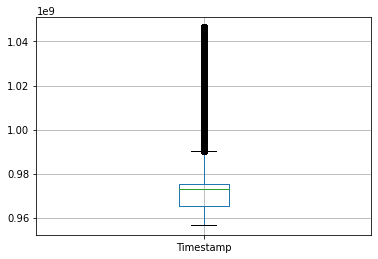

In [119]:
df_merge2.boxplot(column='Timestamp')

outlier handling using flooring and capping

In [120]:
#Using Quantile flooring  at 5% & 95%
for i in cont_cols:
  #Defning the lower & upper cap/cutoff
  lower_cutoff = df_merge2[i].quantile(0.05)
  upper_cutoff = df_merge2[i].quantile(0.95)
  #Replacing the Outliers from both ends with capped cutoffs
  df_merge2[i] = np.where(df_merge2[i] < lower_cutoff,lower_cutoff,df_merge2[i])
  df_merge2[i] = np.where(df_merge2[i] > upper_cutoff, upper_cutoff,df_merge2[i])
  print('Revised skew after Outlier handling '+str(i)+' : '+str(df_merge2[i].skew()))

Revised skew after Outlier handling Timestamp : 0.716591945994963


since the skewness value came between -1 and 1 it means the outliers got reduced to a larger extent.

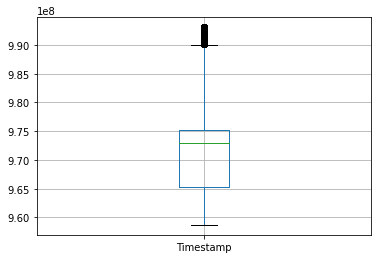

In [121]:
df_merge2.boxplot(column='Timestamp')

Since Age Ratings and are contain numerical data so we check for the outliers in them.



As we know that if skewness value lies between -1 and 1 then the data is normally distributed and any major deviation from this range indicates the presence of extreme values.

In [122]:
print(df_merge2['Age'].skew())
df_merge2['Age'].describe()

0.39847140167374695


count    1.000209e+06
mean     2.973831e+01
std      1.175198e+01
min      1.000000e+00
25%      2.500000e+01
50%      2.500000e+01
75%      3.500000e+01
max      5.600000e+01
Name: Age, dtype: float64

In [123]:
print(df_merge2['Rating'].skew())
df_merge2['Rating'].describe()

-0.5536098874940055


count    1.000209e+06
mean     3.581564e+00
std      1.117102e+00
min      1.000000e+00
25%      3.000000e+00
50%      4.000000e+00
75%      4.000000e+00
max      5.000000e+00
Name: Rating, dtype: float64

So there are no outliers in rating and in age since it's skew
values lies between -1 and 1

Again checking for missing data after handling outliers

Handling missing data

In [124]:
#Missing Features
#Remove a column when populated < 50%
mis_data =pd.DataFrame(df_merge2.count(axis=0)).reset_index()
mis_data.columns =["Feature","Total_Populated"]
mis_data =mis_data[(mis_data['Total_Populated'] < df_merge2.shape[0])]
mis_data

,Feature,Total_Populated


In [125]:
#Checking Sparse rows , if >= 33.3% of columns of a record is not populated then remove the record itself
# Found no record Sparsely populated
rows_missing = df_merge2.isnull().sum(axis=1).reset_index() 
rows_missing.columns = ['row','mis_cnt']
rows_missing[(rows_missing['mis_cnt'] > int(df_merge2.shape[1]/3))]

,row,mis_cnt


In [126]:
#Populate the Missing values in Categorical columns with Mode value
#Mode value for every field
df_merge2.mode().iloc[0]

UserID                          4169
Gender                             M
Age                               25
Occupation                         4
Zip-code                       94110
MovieID                         2858
Rating                             4
Timestamp                9.58704e+08
Title         American Beauty (1999)
Genres                        Comedy
Name: 0, dtype: object

In [127]:
# first we gonna check how many categorial columns are there with missing values
#Categorical Columns with missing values
df_merge2[cat_cols].isnull().sum()

Gender        0
Age           0
UserID        0
Zip-code      0
Rating        0
Occupation    0
Genres        0
Title         0
MovieID       0
dtype: int64

**since  there are no categorial columns with missing so we are not gonna handle it.**





Populate the Missing Values in Continous Columns value with Median

In [128]:
df_merge2.median()

UserID             3070.0
Age                  25.0
Occupation            7.0
MovieID            1835.0
Rating                4.0
Timestamp     973018006.0
dtype: float64

In [129]:
#Check which of continous columns have missing value
df_merge2[cont_cols].isnull().sum()

Timestamp    0
dtype: int64

since there are no missing values so we are not gonna handle it

In [130]:
'''#Populate Continous with Median
for cols in cont_cols:
  if ( df_merge2[cols].isnull().sum() > 0):
    df_merge2[cols] = df_merge2[cols].fillna(df_merge2[cols].median())'''#This is just to show how we replace missing values with median for continuous columns 

'#Populate Continous with Median\nfor cols in cont_cols:\n  if ( df_merge2[cols].isnull().sum() > 0):\n    df_merge2[cols] = df_merge2[cols].fillna(df_merge2[cols].median())'

In [131]:
#Check which of continous columns have missing value
df_merge2[cont_cols].isnull().sum()

Timestamp    0
dtype: int64

Data Analysis

In [132]:
#displays high rated movies
high_rated=df_merge2['Rating']>4

In [133]:
df_merge2[high_rated][['Title','Genres','Rating']].head(30)

,Title,Genres,Rating
0,One Flew Over the Cuckoo's Nest (1975),Drama,5
4,"Bug's Life, A (1998)",Animation|Children's|Comedy,5
6,Ben-Hur (1959),Action|Adventure|Drama,5
7,"Christmas Story, A (1983)",Comedy|Drama,5
10,Beauty and the Beast (1991),Animation|Children's|Musical,5
14,"Sound of Music, The (1965)",Musical,5
18,Awakenings (1990),Drama,5
22,Back to the Future (1985),Comedy|Sci-Fi,5
23,Schindler's List (1993),Drama|War,5
25,Pocahontas (1995),Animation|Children's|Musical|Romance,5


In [134]:
#displays low rated movies
#displays high rated movies
high_rated=df_merge2['Rating']<4
df_merge2[high_rated][['Title','Genres','Rating']].head(30)

,Title,Genres,Rating
1,James and the Giant Peach (1996),Animation|Children's|Musical,3
2,My Fair Lady (1964),Musical|Romance,3
5,"Princess Bride, The (1987)",Action|Adventure|Comedy|Romance,3
16,Tarzan (1999),Animation|Children's,3
20,Pleasantville (1998),Comedy,3
21,Wallace & Gromit: The Best of Aardman Animatio...,Animation,3
24,Meet Joe Black (1998),Romance,3
29,"Close Shave, A (1995)",Animation|Comedy|Thriller,3
56,Courage Under Fire (1996),Drama|War,3
60,Star Wars: Episode I - The Phantom Menace (1999),Action|Adventure|Fantasy|Sci-Fi,3


In [135]:
#top 25 most rated movies
most_rated=df_merge2.groupby('Title').size().sort_values(ascending=False)[:25]
most_rated.head(25)

Title
American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Saving Private Ryan (1998)                               2653
Terminator 2: Judgment Day (1991)                        2649
Matrix, The (1999)                                       2590
Back to the Future (1985)                                2583
Silence of the Lambs, The (1991)                         2578
Men in Black (1997)                                      2538
Raiders of the Lost Ark (1981)                           2514
Fargo (1996)                                             2513
Sixth Sense, The (1999)                                  2459
Braveheart (1995)                                        2443
Shakespeare in Love (1998)                               2369
Pr

In [136]:
#slicing out columns to display only title and genres columns from df_merge2.csv
df_merge2[['Title','Genres']].head()

,Title,Genres
0,One Flew Over the Cuckoo's Nest (1975),Drama
1,James and the Giant Peach (1996),Animation|Children's|Musical
2,My Fair Lady (1964),Musical|Romance
3,Erin Brockovich (2000),Drama
4,"Bug's Life, A (1998)",Animation|Children's|Comedy


In [137]:
df_merge2.shape

(1000209, 10)

Bivariate Analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f00ff2ab1d0>,
      dtype=object)

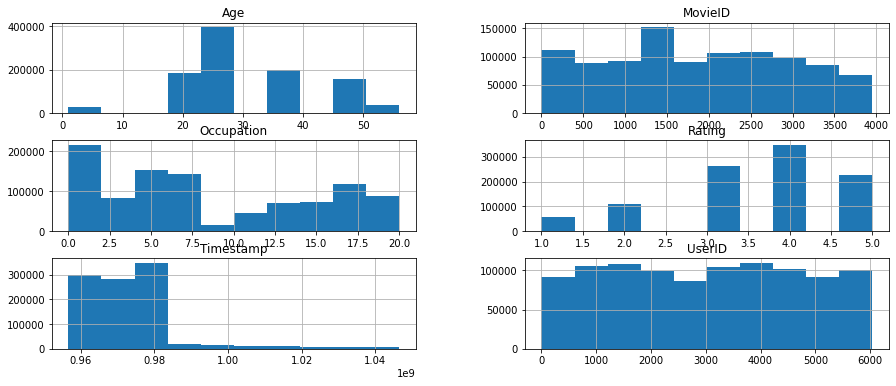

In [79]:
#Takes all numerical data (continous or categorical) and plots
df_merge2.hist(figsize=[15,6])

Inferences


*   Frequency is highest for rating 4 and least for 1
*   Frequency is Highest for age group approx(22-29) least for below 10

*   Frequency for 0 occupation is highest i.e for('others' or 'not specified' and least from (7.5-10.0)
*   Frequency of MovieID and UserID are continuouly increases or decreases.





In [80]:
len(df_merge2['Title'])

1000209

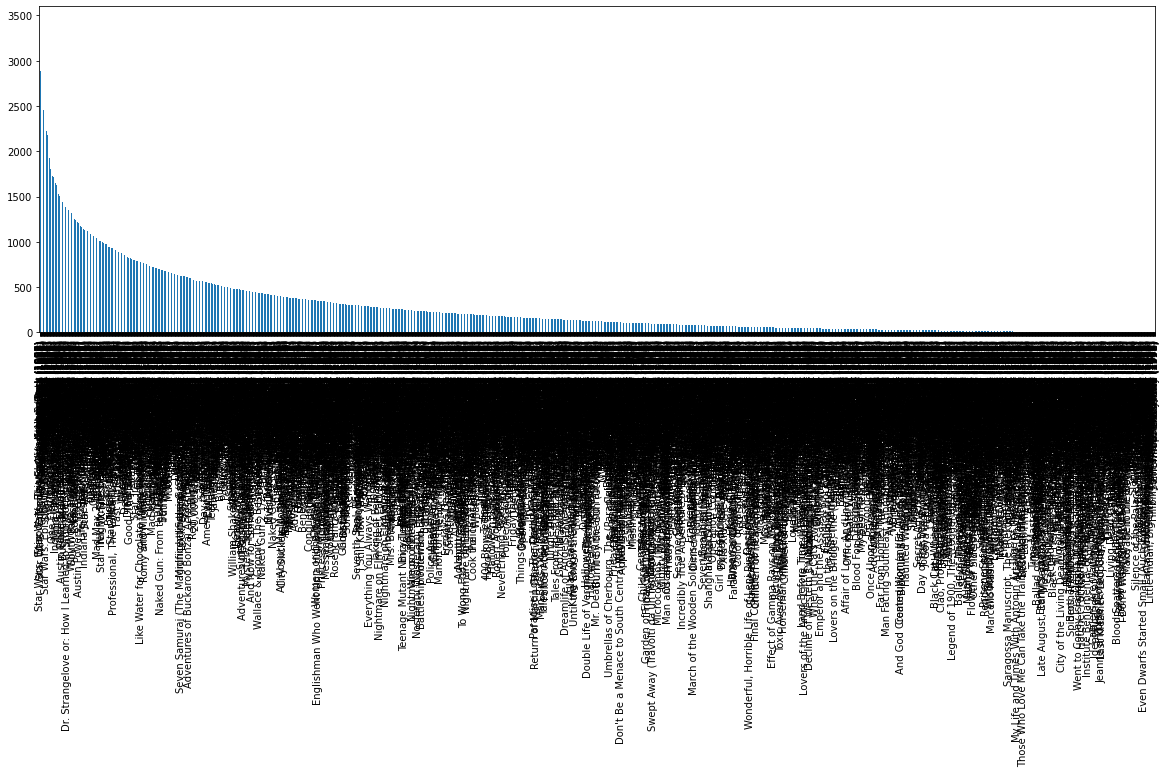

In [81]:
df_merge2['Title'].value_counts().plot.bar(figsize=[20,6])

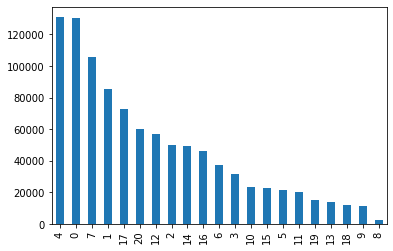

In [82]:
df_merge2['Occupation'].value_counts().plot.bar()

Inferences


*   Highest frequency is for Ocuupation  4 i.e('col')
*   Lowest frequency is for Occupation 8 i.e('Farmer')

The Trend that i am observing is that the frequency of observation highest at for and then it is continuously decreases. 







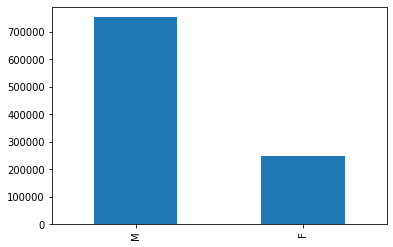

In [83]:
df_merge2['Gender'].value_counts().plot.bar()

Inference


*   Frequency of number of users is higher for male as compare to female.




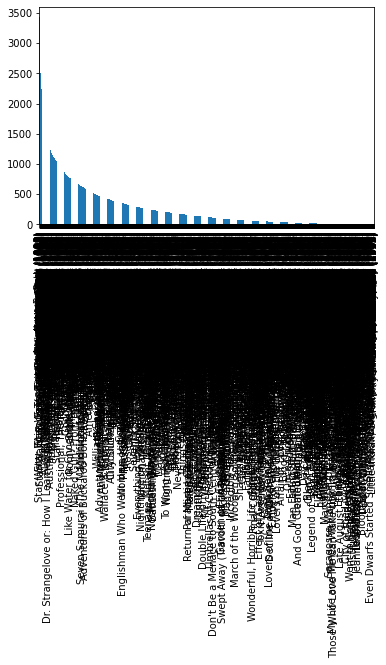

In [84]:
df_merge2['Title'].value_counts().plot.bar()

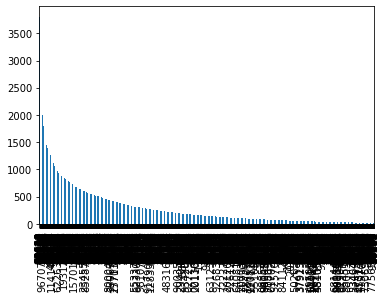

In [85]:
df_merge2['Zip-code'].value_counts().plot.bar()

In [86]:
# define a function that counts the number of times each genre appear
def count_word(df1,ref_col,liste):
  keyword_count=dict()
  for s in liste:
    keyword_count[s]=0
  for liste_keywords in df1[ref_col].str.split('|'):
    if type(liste_keywords)==float and pd.isnull(liste_keywords):
      continue
    for s in liste_keywords:
      if pd.notnull(s):
        keyword_count[s]+=1
  keyword_occurrences=[]  #convert dictionary into list to sort the keywords by frequency
  for k,v in keyword_count.items():
    keyword_occurrences.append([k,v])
  keyword_occurrences.sort(key=lambda x:x[1],reverse=True)
  return keyword_occurrences,keyword_count

In [87]:
# making census of the genres
genre_labels=set()
for s in df_merge2['Genres'].str.split('|').values:
  genre_labels=genre_labels.union(set(s))

In [88]:
#counting how many times each genres occur
keyword_occurences,dum=count_word(df_merge2,'Genres',genre_labels)
keyword_occurences

[['Comedy', 356580],
 ['Drama', 354529],
 ['Action', 257457],
 ['Thriller', 189680],
 ['Sci-Fi', 157294],
 ['Romance', 147523],
 ['Adventure', 133953],
 ['Crime', 79541],
 ['Horror', 76386],
 ["Children's", 72186],
 ['War', 68527],
 ['Animation', 43293],
 ['Musical', 41533],
 ['Mystery', 40178],
 ['Fantasy', 36301],
 ['Western', 20683],
 ['Film-Noir', 18261],
 ['Documentary', 7910]]

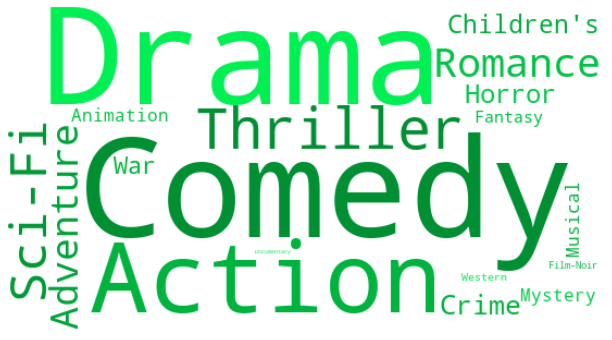

In [89]:
from wordcloud import WordCloud, STOPWORDS
# Function that control the color of the words
def random_color_func(word=None, font_size=None, position=None,
                      orientation=None, font_path=None, random_state=None):
    h = int(360.0 * tone / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(70, 120)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)


#Finally, the result is shown as a wordcloud:
words = dict()
trunc_occurences = keyword_occurences[0:50]
for s in trunc_occurences:
    words[s[0]] = s[1]
tone = 100 # define the color of the words
f, ax = plt.subplots(figsize=(14, 6))
wordcloud = WordCloud(width=550,height=300, background_color='white', 
                      max_words=1628,relative_scaling=0.7,
                      color_func = random_color_func,
                      normalize_plurals=False)
wordcloud.generate_from_frequencies(words)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In above the word '**comedy**' is the most commonly used word in movies genre.Action,Drama and Thriller are also among the most occuring words.I think This encapsulates the idea of  presence of comedy in large amount in movies genres.  

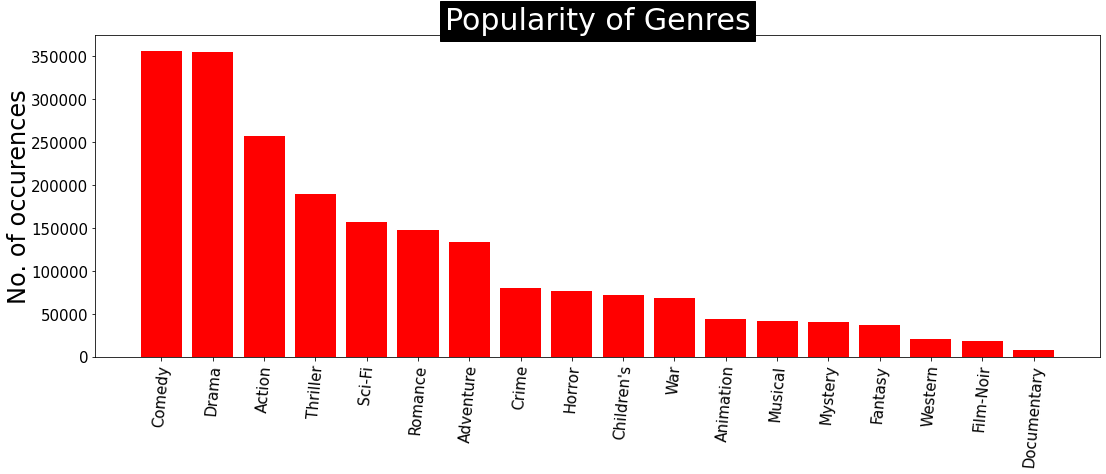

In [90]:
# lets display the same result in the histogram
fig = plt.figure(1, figsize=(18,13))
ax2 = fig.add_subplot(2,1,2)
y_axis = [i[1] for i in trunc_occurences]
x_axis = [k for k,i in enumerate(trunc_occurences)]
x_label = [i[0] for i in trunc_occurences]
plt.xticks(rotation=85, fontsize = 15)
plt.yticks(fontsize = 15)
plt.xticks(x_axis, x_label)
plt.ylabel("No. of occurences", fontsize = 24, labelpad = 0)
ax2.bar(x_axis, y_axis, align = 'center', color='r')
plt.title("Popularity of Genres",bbox={'facecolor':'k', 'pad':5},color='w',fontsize = 30)
plt.show()

In above the word 'comedy' is the most commonly used word in movies genre.Action,Drama and Thriller are also among the most occuring words.I think This encapsulates the idea of presence of comedy in large amount in movies genres.


Least occurent genres are Documentary,film-Noir,Western.



Bivariate Analysis

Categorial data types

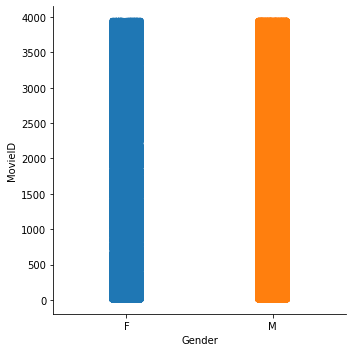

In [91]:
sns.catplot(x='Gender',y='MovieID',data=df_merge2)

Inferences

from above plot we conclude that MovieID 4000  was being searched by equal no of males and females.

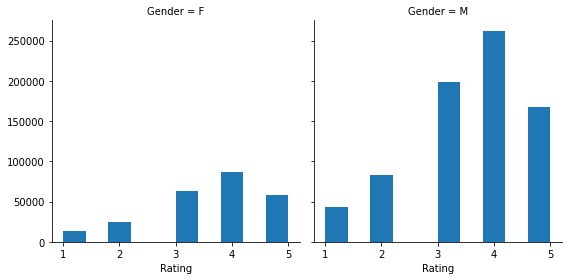

In [92]:
fn = sns.FacetGrid(df_merge2,col='Gender',height=4, aspect=1)
fn = fn.map(plt.hist,"Rating")

Inferences


*   First we conclude that highest rating that was given to any movie is 4 and that too by Males in large number in comparison to Females.
*  Secondly 2nd most Ratings that was given are 5 and that too also by males in large number and that also by males in comparision to females.


*   Lowest number of Ratings are 1 and it is given in least amount by females in comparison to males.






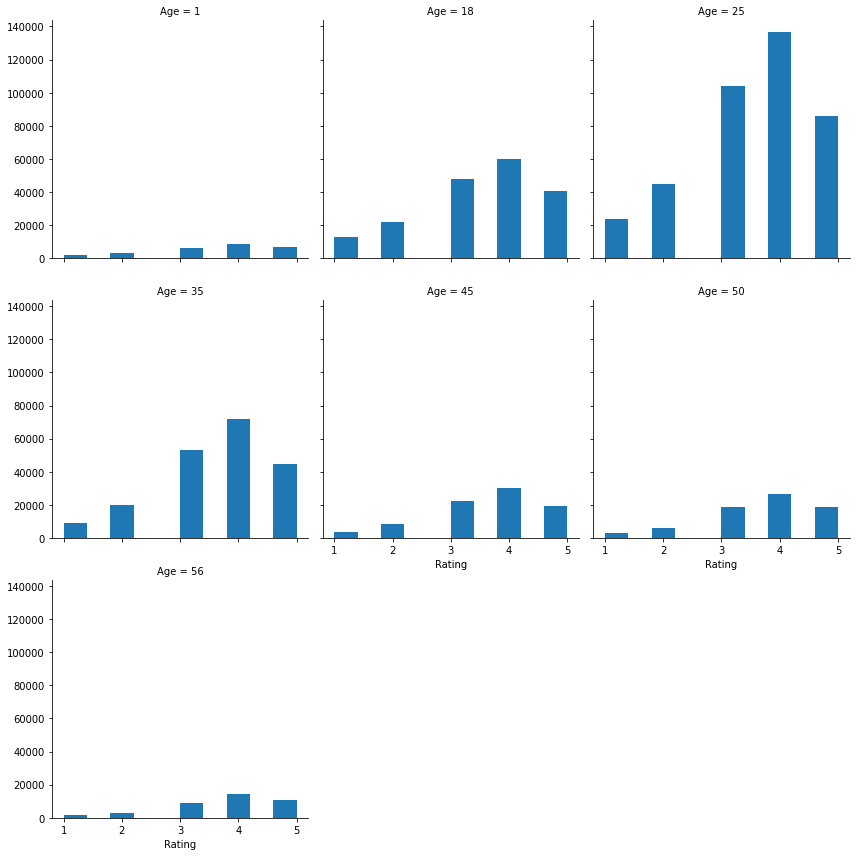

In [93]:
fn = sns.FacetGrid(df_merge2,col='Age',col_wrap=3,height=4, aspect=1)
fn = fn.map(plt.hist,"Rating")

Inferences

*   The users of age group 25-34 are most concerned about giving 
Rating.
*   The users of age group under 18 and 56+ are least concerned about giving Rating.


 
 *   The Rating given by age group 18-24 and 35-44 are almost same and thsere are users who are concerned about giving ratings after age group 25-34 .
  

*   similarly for age group 45-49 and 50-55










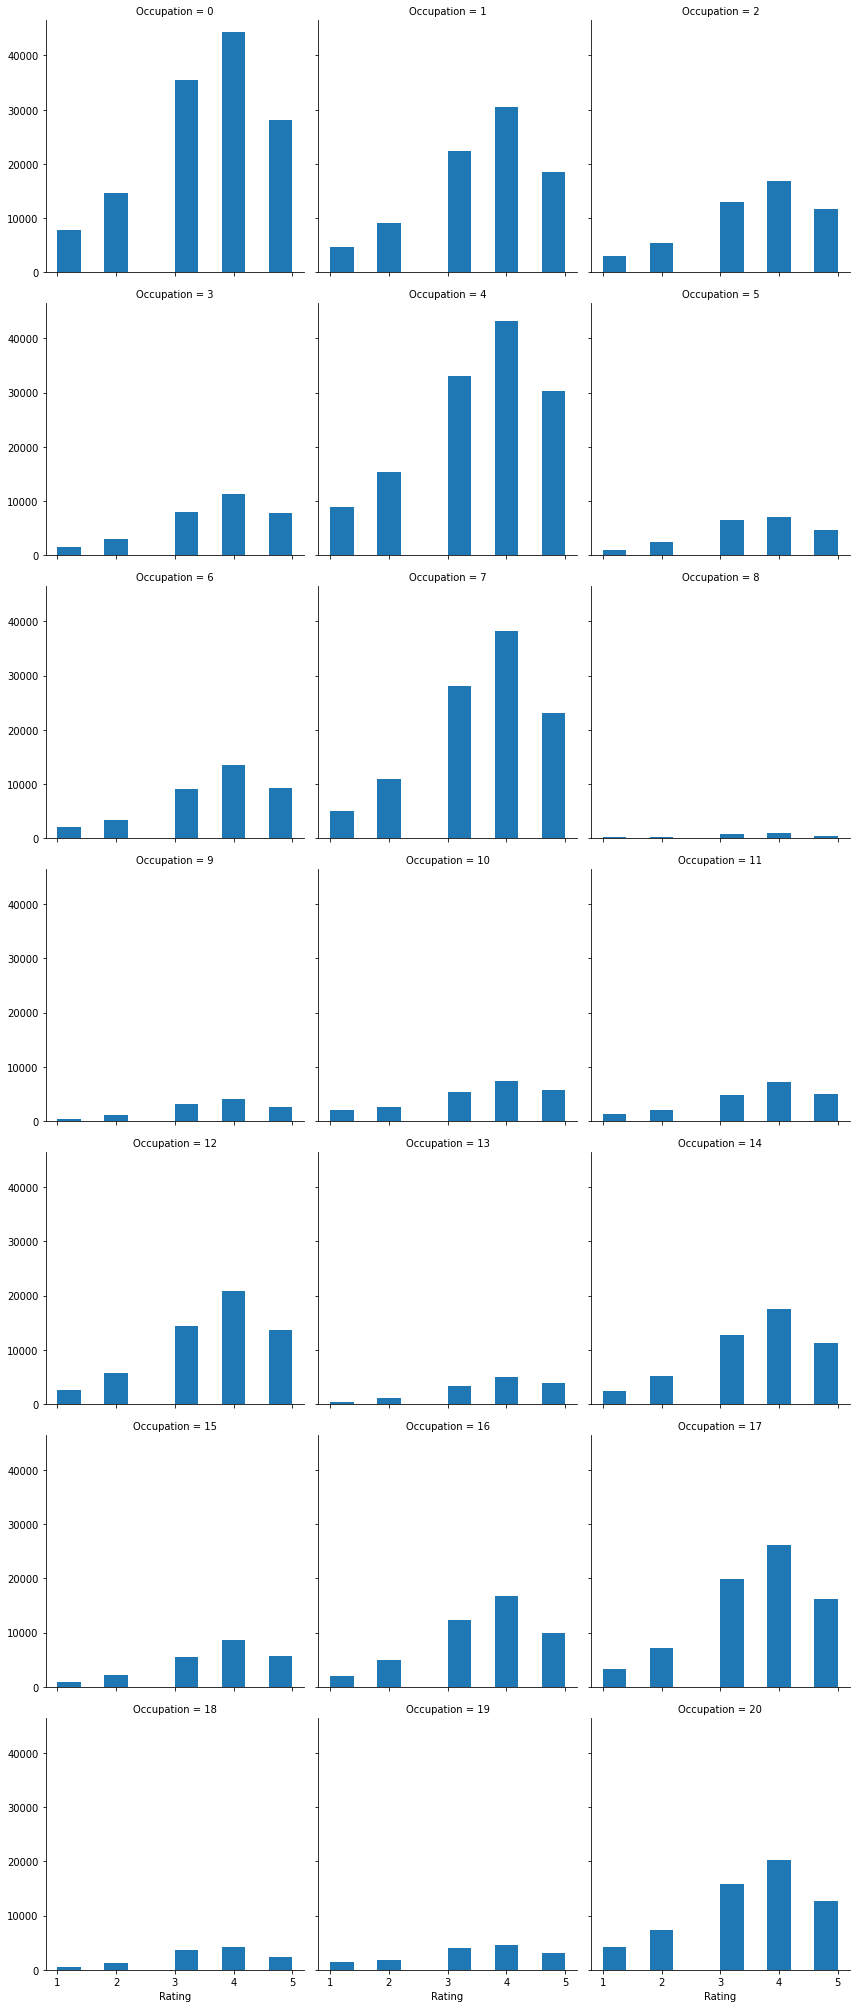

In [94]:
fn = sns.FacetGrid(df_merge2,col='Occupation',col_wrap=3,height=4, aspect=1)
fn = fn.map(plt.hist,"Rating")



*   Ratings are Highest for occupation 0 and 4

---


*   2nd highest for occupation 7

 

*   Ratings are Least for occupation 8
*   Ratings given are 3rd highest by occupation 1




* Ratings given are almost same for occupation 3 and 6 



Text(0.5, 0, 'age')

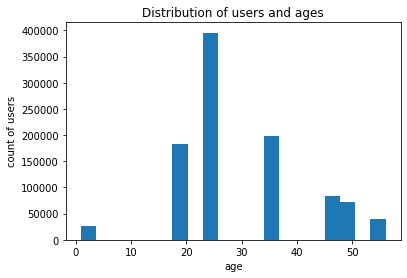

In [95]:
#which movies are most controversial among different ages
df_merge2.Age.plot.hist(bins=20)
plt.title("Distribution of users and ages")
plt.ylabel('count of users')
plt.xlabel('age')

From all above visualisation i come to a point that  i have found no use of time stamp and zip-code in my dataset so i am dropping it

Keeping in mind the broad categories of recommendation system algorithms,what features you will and why?

